<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EC%B2%AD%EB%8B%B4%ED%95%A9%EA%B2%A9%EC%9E%90_RPA_2023%ED%95%99%EB%85%84%EB%8F%84_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법
path = '/content/drive/MyDrive/python/cheongdam/'
df = pd.read_excel(f'{path}cheongdam_susi2023.xlsx')


# 첫 5줄을 봅니다.
df.head(2)

In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


***2023학년도 C고 합격자수***
연세대 합격자수 / 수시: 1명, 정시: 0명
고려대 합격자수 / 수시: 2명, 정시: 0명
성균관대 합격자수 / 수시: 2명, 정시: 0명
한양대 합격자수 / 수시: 1명, 정시: 0명
중앙대 합격자수 / 수시: 2명, 정시: 0명
경희대 합격자수 / 수시: 1명, 정시: 0명
이화여대 합격자수 / 수시: 2명, 정시: 0명
건국대 합격자수 / 수시: 1명, 정시: 0명
동국대 합격자수 / 수시: 2명, 정시: 0명
홍익대 합격자수 / 수시: 2명, 정시: 0명
국민대 합격자수 / 수시: 1명, 정시: 0명
숭실대 합격자수 / 수시: 1명, 정시: 0명
세종대 합격자수 / 수시: 2명, 정시: 0명


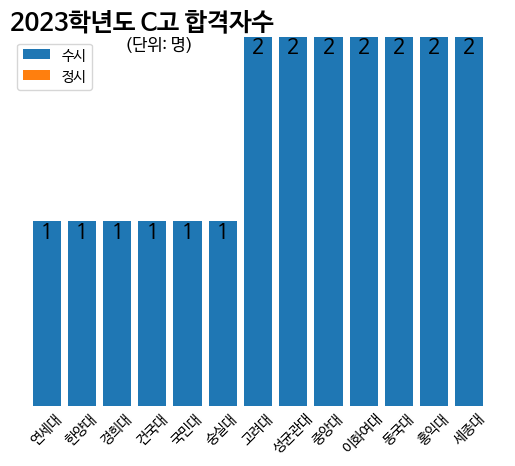

In [12]:
#RPA로 합불자료에서 그래프 자동 완성

import pandas as pd
import matplotlib.pyplot as plt

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '국민대', '숭실대', '세종대', '단국대']


print("\n***2023학년도 C고 합격자수***")

uni_new = []
num_su = []
num_je = []

for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['지원시기', '대학', '최종']]

    # '수시정시' 대신 '지원시기' 열을 사용
    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] != '수시'])  # '수시'가 아닌 경우는 모두 '정시'로 가정

    if (num_su_u > 0) or (num_je_u > 0):
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 / 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")

if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]

    # plot the bar graph

    fig, ax = plt.subplots()
    ax.bar(uni_new, num_su, label='수시')
    ax.bar(uni_new, num_je, bottom=num_su, label='정시')


    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        ax.text(i, su-0.06, su, ha='center', va='center', fontsize=15)
        #ax.text(i, je+0.02, je, ha='center', va='center', fontsize=10)

        #ax.text(i, su/2, su, ha='center', va='center')  예비코드: 수시와 정시합격자가 누적될때 적절한 수시합격자수 위치
        #ax.text(i, su + je/2, je, ha='center', va='center') 예비코드: 수시와 정시합격자가 누적될때 적절한 정시합격자수 위치

   # X축 눈금(ticks) 제거
    ax.tick_params(axis='x', which='both', length=0)

    ax.legend()
    # 그래프 제목
    ax.set_title('2023학년도 C고 합격자수', fontsize=18, fontweight='bold', loc='left')

    # 그래프 부제목
    ax.text(0.30, 1.00, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)


    plt.xticks(rotation=45)
    plt.box(False) #테두리 박스 제거
    plt.yticks([]) #y축 제거
    plt.show()
else:
    print("조건에 맞는 대학이 없습니다.")


In [ ]:
df.columns

In [ ]:
# 서울 주요대학 수시합격자 명단 출력
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대' , '국민대', '숭실대', '세종대', '단국대']

print("***2023학년도 C고 서울 주요대학 수시합격자 명단***\n")
for u in range(len(uni)):
    df_주요대 = df[(df.대학 == uni[u]) & (df.최종 == '합')]
    print("%s 대학 합격자" % uni[u])
    df_주요대 = df_주요대[['전과목', '전형분류', '대학', '모집단위', '최종',  '백분위_수능']]


    print(df_주요대)
    print("----------------------------------------------------------------------------------")


In [ ]:
#3.특수대 합격자 명단 출력
#특수대 명칭 확인(KAIST, GIST, UIST, DIGIST)

sp = ['경찰대', '육군사관학교', '해군사관학교', '공군사관학교', '국군간호사관학교', '광주과학기술원', '대구경북과학기술원', '울산과학기술대학교', 'KAIST', '한국예술종합학교']

# Create an empty DataFrame to store the results
df_result = pd.DataFrame()

print("***2023학년도 고 특수대 합격자 명단***\n")
for u in range(len(sp)):
    df_특수대 = df[(df.대학 == sp[u]) & (df.최종 == '합')]
    df_특수대 = df_특수대[['지원시기', '대학', '모집단위', '전형분류', '최종', '전과목', '백분위_수능']]
    print("%s 대학 합격자" % sp[u])
    print(df_특수대)
    print("--------------------------------------------------------")

# Append the results to the df_result DataFrame
    df_result = pd.concat([df_result, df_특수대])


# Save the results to an Excel file
path = '/content/drive/MyDrive/python/cheongdam/result_cheongdam/'
df_result.to_excel(f'{path}uni_특수대.xlsx', index=False, header=True)


# 특수대 합격자수
print("\n***2023학년도 C고 특수대 합격자수***")

total_passed = 0  # initialize the total number of passed students

for u in range(len(sp)):
    df_특수대 = df[(df.대학 == sp[u]) & (df.최종 == '합')]
    df_특수대 = df_특수대[['대학', '모집단위', '전형분류', '최종']]
    total_passed += len(df_특수대)  # add the number of passed students for the current university

print(f"2023학년도 C고 특수대 수시합격자수는 {total_passed}명입니다.")

In [ ]:
#변수를 한줄에서 나란히 볼수 있게 바꿈: tabulate 라이브러리 사용

from tabulate import tabulate

# 내신 구간별 지원패턴: 학번, 내신, 전형분류, 전형방법, 최종, 대학 출력
mx = float(input("내신등급 이상:"))
mi = float(input("내신등급 미만:"))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df['전과목'] >= mx) & (df['전과목'] < mi) & ~(df.전형분류 == '수능')].copy()  # Note the .copy() here


list_1 = df_interval[['전과목', '전형분류', '대학', '모집단위', '최종']]

#list_1 = df_interval[['전과목', '전형분류', '전형방법', '최종', '대학', '모집단위']]
all_headers = ['전과목', '전형분류', '대학', '모집단위', '최종']


# Create the formatted table using tabulate
table_string = tabulate(list_1, headers=all_headers, tablefmt='plain')
print()
print(table_string)
print("------------------------------")
print("{}등급이상 {}등급미만 :{}건".format(mx, mi, len(df_interval)))

In [ ]:
#내신 구간별 결과를 내신성적별로 소트


import pandas as pd
from tabulate import tabulate

# 내신 구간별 지원패턴: 학번, 내신, 전형분류, 대학, 모집단위, 최종 출력
mx = float(input("이상: "))
mi = float(input("미만: "))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.전과목 >= mx) & (df.전과목 < mi) & ~(df.전형분류 == '수능')].copy()

list_1 = df_interval[['전과목', '전형분류', '대학', '모집단위', '최종']]


# 정렬하기 위해 headers 만들기
all_headers = [ '전과목', '전형분류', '대학', '모집단위', '최종']

# Create the formatted table using tabulate
table_string = tabulate(list_1, headers=all_headers, tablefmt='plain')
print()
print(table_string)
print("------------------------------")
print("{}등급이상 {}등급미만 :{}건".format(mx, mi, len(df_interval)))

# Convert DataFrame to Excel format
output_excel_file = "level_2.xlsx"

path = '/content/drive/MyDrive/python/banpo/'

#결과를 엑셀파일로 변환
#list_1.to_excel(f"{path}output_excel.xlsx", index=False)
list_1.to_excel(f"{path}{output_excel_file}", index=False)

In [ ]:
#내신 구간별 결과를 내신성적별로 소트(1)해서 자동파일제목(2) 붙여 저장
import pandas as pd
from tabulate import tabulate

# 내신 구간별 지원패턴: 내신, 전형분류, 대학, 모집단위, 최종 출력
mx = float(input("이상: "))
mi = float(input("미만: "))


# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.전과목 >= mx) & (df.전과목 < mi) & ~(df.전형분류 == '수능')].copy()


#필요한 열 모으기
list_1 = df_interval[[ '전과목', '전형분류', '대학', '모집단위', '최종', '백분위_수능']]


# 정렬하기 위해 headers 만들기
all_headers = [ '전과목', '전형분류', '대학', '모집단위', '최종', '백분위_수능']

# Create the formatted table using tabulate
table_string = tabulate(list_1, headers=all_headers, tablefmt='plain')
print()
print(table_string)
print("------------------------------")
print("{}등급이상 {}등급미만 :{}건".format(mx, mi, len(df_interval)))

# Convert DataFrame to Excel format
output_excel_file =  f"level_{int(mx)}.xlsx"

path = '/content/drive/MyDrive/python/cheongdam/result_cheongdam/'

#결과를 엑셀파일로 변환
list_1.to_excel(f"{path}{output_excel_file}", index=False)

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate


# 내신 구간별 지원패턴
mx = float(input("이상:"))
mi = float(input("미만:"))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.전과목 >= mx) & (df.전과목 < mi)].copy()

# Group by '전형분류' and count the frequency
grouped = df_interval.groupby('전형분류').size().sort_values(ascending=False).reset_index(name='빈도')

grouped = grouped[~(grouped.전형분류 == '수능')]

# Calculate the total
total = grouped['빈도'].sum()

# Compute the percentage
grouped['비율'] = (grouped['빈도'] / total * 100).round(2)

# Compute the fraction with a denominator of 6
grouped['분수'] = (np.round(grouped['비율'] / 100 * 6)).astype(int).astype(str) + "/6"

# Reorder the columns for display
combined = grouped[['빈도', '분수', '비율', '전형분류']]


#headers를 만듬
all_headers = ['빈도', '분수', '비율', '전형분류']

# Create the formatted table using tabulate
table_string = tabulate(combined, headers = all_headers, tablefmt='plain')

print(table_string)
print("---------------------------------")
print("C고 {}등급 이상 {}등급 미만: {}건".format(mx, mi, total))

In [ ]:
# 수시 합격자들의 평균합격건수

# 라이브러리
import pandas as pd

# Set pandas display option
pd.set_option('display.max_rows', None)


# 수시합격자
kg_df = df[(df.최종 == '합')]


# 학번별 합격건수
kg_df_count = kg_df.groupby('학번')['최종'].count()

#1인당 최다 합격건수
s_max = kg_df_count.max()

# Convert the index to a modified version of itself
#kg_df_count.index = kg_df_count.index.map(lambda x: x[:2] + '*' + x[3:] if len(x) >= 3 else x[:2])

# Unique students based on 이름 and 학번
unique_students = kg_df[['학번']].drop_duplicates()

# Number of unique students
st_num = len(unique_students)

# 총합격건수
total = len(kg_df)

# 평균 합격 건수
average_count = kg_df_count.mean().round(1)

print(f"C고 수시합격자수는 {st_num}명이고 총합격건수는 {total}건입니다.")
print(f"학생1인당 최다 합격건수는 {s_max}건입니다")
print()
print(kg_df_count)
print(f"학생당 수시 6회 중 합격횟수: {average_count}건")

In [ ]:
# 수시 합격자들의 평균합격건수

# 라이브러리
import pandas as pd

# Set pandas display option
pd.set_option('display.max_rows', None)


# 수시합격자
kg_df = df[(df.최종 == '합')]


# 학번별 합격건수
kg_df_count = kg_df.groupby('학번')['최종'].count()

#1인당 최다 합격건수
s_max = kg_df_count.max()

# Convert the index to a modified version of itself
#kg_df_count.index = kg_df_count.index.map(lambda x: x[:2] + '*' + x[3:] if len(x) >= 3 else x[:2])

# Unique students based on 이름 and 학번
unique_students = kg_df[['학번']].drop_duplicates()

# Number of unique students
st_num = len(unique_students)

# 총합격건수
total = len(kg_df)

# 평균 합격 건수
average_count = kg_df_count.mean().round(1)

print(f"C고 수시합격자수는 {st_num}명이고 총합격건수는 {total}건입니다.")
print(f"학생1인당 최다 합격건수는 {s_max}건입니다")
print()
print(kg_df_count)
print(f"C고 학생당 수시 6회 중 합격횟수: {average_count}건")

In [21]:
df_uni = df['대학'].value_counts()

df_uni_num = len(df_uni)

print(f"지원대학 총수는 {df_uni_num}개입니다.")
print(df_uni)

지원대학 총수는 111개입니다.
성균관대       24
이화여대       23
경희대        21
중앙대        21
한양대        19
           ..
동국대(경주)     1
나사렛대        1
한서대         1
정화예술대학교     1
서울신학대       1
Name: 대학, Length: 111, dtype: int64


In [ ]:
 # 수시 4년제 합격자들의 평균합격건수

# 라이브러리
import pandas as pd

# Set pandas display option
pd.set_option('display.max_rows', None)


# 수시합격자

##전문대 - 대학교로 끝나는 곳
kg_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]

#전문대 - 대학으로 끝나는 곳
kg_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학"))]


# 학번별 합격건수
kg_df_count = kg_df.groupby('학번')['최종'].count()

#1인당 최다 합격건수
s_max = kg_df_count.max()

# Convert the index to a modified version of itself
#kg_df_count.index = kg_df_count.index.map(lambda x: x[:2] + '*' + x[3:] if len(x) >= 3 else x[:2])

# Unique students based on 이름 and 학번
unique_students = kg_df[['학번']].drop_duplicates()

# Number of unique students
st_num = len(unique_students)

# 총합격건수
total = len(kg_df)

# 평균 합격 건수
average_count = kg_df_count.mean().round(1)

print(f"C고 4년제대 수시합격자수는 {st_num}명이고 총합격건수는 {total}건입니다.")
print(f"학생1인당 4년제대 최다 합격건수는 {s_max}건입니다")
print()
print(kg_df_count)
print(f"4년제대 학생당 수시 6회 중 합격횟수: {average_count}건")



최저등급을 입력하세요: 1
최고등급을 입력하세요: 3
구간 크기를 입력하세요: 0.5


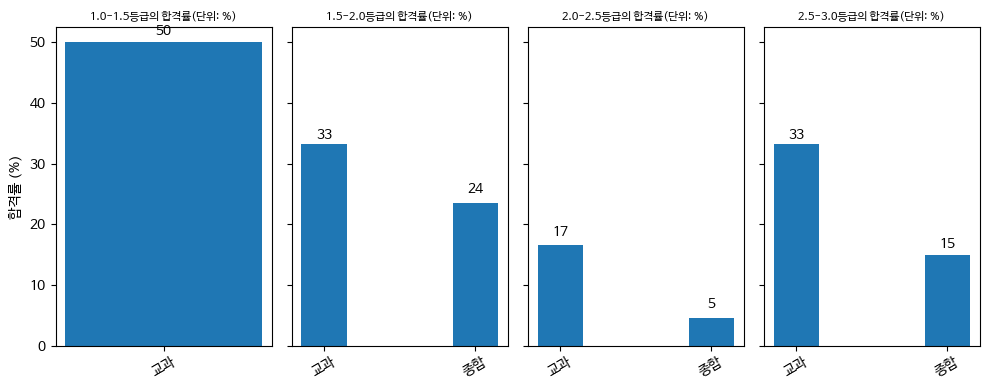

In [23]:
#1.내신등급의 구간별 교과, 종합의 합격률 그래프

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 최저 등급과 최고 등급을 입력받기
min_grade = float(input("가장 높은 내신을 입력하세요: "))
max_grade = float(input("가장 낮은 내신을 입력하세요: "))

# 구간 크기 입력받기
interval_size = float(input("구간 크기를 입력하세요: "))


# 최저 등급부터 최고 등급까지 구간별로 반복
fig, axes = plt.subplots(1, int((max_grade - min_grade) / interval_size), figsize=(10, 4), sharey=True)  # 서브플롯 생성
for i, grade in enumerate(np.arange(min_grade, max_grade, interval_size)):
    mx = grade + interval_size
    mi = grade

    # mx이상 mi이하 조건을 충족하는 객체 만들기
    df_interval = df[(df.전과목 >= mi) & (df.전과목 < mx) & ~(df.전형분류 == '수능')].copy()

    # '전형분류'별 지원 건수 계산
    grouped = df_interval.groupby('전형분류').size().reset_index(name='지원건수')

    # '전형분류'별 합격 건수 계산
    grouped_pass = df_interval[df_interval['최종'] == '합'].groupby('전형분류').size().reset_index(name='합격건수')

    # 합치기
    grouped = pd.merge(grouped, grouped_pass, on='전형분류')

    # 합격률 계산
    grouped['합격률'] = (grouped['합격건수'] / grouped['지원건수'] * 100).round(2)

    # Plotting
    # Plotting
    ax = axes[i]
    bars = ax.bar(grouped['전형분류'], grouped['합격률'], width=0.3)
    #ax.set_xlabel('전형분류')
    if i == 0:
        ax.set_ylabel('합격률 (%)')  # y 레이블은 첫 번째 서브플롯에만 표시
    ax.set_title(f'{mi}-{mx}등급의 합격률(단위: %)', fontsize=8)
    ax.set_xticks(np.arange(len(grouped['전형분류']))) # x축 틱 위치 설정
    ax.set_xticklabels(grouped['전형분류'], rotation=30)  # x축 레이블 회전


    # 각 막대 위에 값을 표시
    for bar in bars:
        yval = round(bar.get_height())  # 반올림
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#4. 지역균형(수시 교과) 합격자수와 합격률

#라이브러리 불러오기
from tabulate import tabulate


#전형명 중 지역균형을 찾기
df_지역균형 = df['전형명'].str.contains('지역균형|추천') & ~df['전형명'].str.contains('자기')


#지역균형 열들만 모으기
subset_df = df.loc[df_지역균형]

#지역균형 합(격자)를 모으기
subset_df_p = subset_df.loc[(subset_df['최종'] == '합') & (subset_df['전형분류'] == '교과')].copy()
#subset_df_p = subset_df.loc[subset_df['최종'] == '불'].copy()


# 전체 응시자 수 (지역균형 전형에 해당하는 행의 수)
total_applicants = len(df.loc[df_지역균형])

# 합격자 수
total_pass = len(subset_df_p)

# 합격률 계산
pass_rate = (total_pass / total_applicants) * 100

#필요한 변수(열) 부르기
subset_df_p = subset_df_p[[ '대학', '모집단위', '전형분류', '전형명',  '최종', '전과목', '백분위_수능', '표준점수합']]


# '전과목' column의 값들을 소수점 둘째 자리까지 반올림
subset_df_p['전과목'] = subset_df_p['전과목'].round(2)

# '백분위_평균' column의 값들을 소수점 둘째 자리까지 반올림
subset_df_p['백분위_수능'] = subset_df_p['백분위_수능'].round(1)


#list_1 = df_interval[['이름', '전과목', '전형분류', '전형방법', '최종', '대학', '모집단위']]
all_headers = [ '대학', '모집단위', '전형분류', '전형명',  '최종', '전과목', '백분위_수능', '표준점수합']


# Create the formatted table using tabulate
table_string = tabulate(subset_df_p, headers=all_headers, tablefmt='plain')

print("***2023학년도 C고 지역균형 합격자 명단***")
print(table_string)
print("-----------------------------------------------------------------------------------------------------------------------------")
print(f"2023학년도 C고 지역균형(수시 교과) 합격자는 지원자{total_applicants}명 중 {len(subset_df_p)}명입니다(복수합격 포함).")
print()
print(f"2023학년도 C고 지역균형(수시 교과) 합격률은 {pass_rate:.0f}%입니다.") # 소수 둘째자리까지 출력